![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Text Extraction: An Introduction

Extracting text of various sizes, shapes, and orientations from images is an essential problem in many contexts, especially in e-commerce, augmented reality assistance systems, and content moderation in social media platforms. To tackle this problem, one needs to accurately extract the text from images.

Basically, text extraction can be achieved in two methods:

- Two step process, i.e., text detection and text recognition
- Single step process, i.e., by training a single model to achieve both text detection and recognition.

We will be focusing on the Two step method here.

1. **Text detection** helps identify the region in the image where the text is present.  It takes in an image as an input, and outputs the bounding boxes.

2. **Text recognition** extracts the text from the input image using the bounding boxes obtained from the text detection model. It takes in an image and some bounding boxes as inputs and outputs some raw text.

Mostly, the text detection methods can be broadly classified into 2 categories:

- Conventional methods
- Deep Learning based methods

Conventional methods rely on manually designed features. For instance, Stroke width Transform (SWT) and Maximally Stable Extremal Regions (MSER) based methods generally extracts the character candidates via edge detection or extremal region extraction.

In the deep learning based methods, features are learned from the training data. These are generally better than the conventional ones, in terms of both accuracy and adaptability in challenging scenarios. Connectionist Text Proposal Network (CTPN) and Efficient and Accurate Scene Text Detector (EAST) are very famous Deep Learning based text detection methods.

For text detection, you can use any of the techniques mentioned above based on the complexity of the use case that you have in hand.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Text Recognition Pipeline

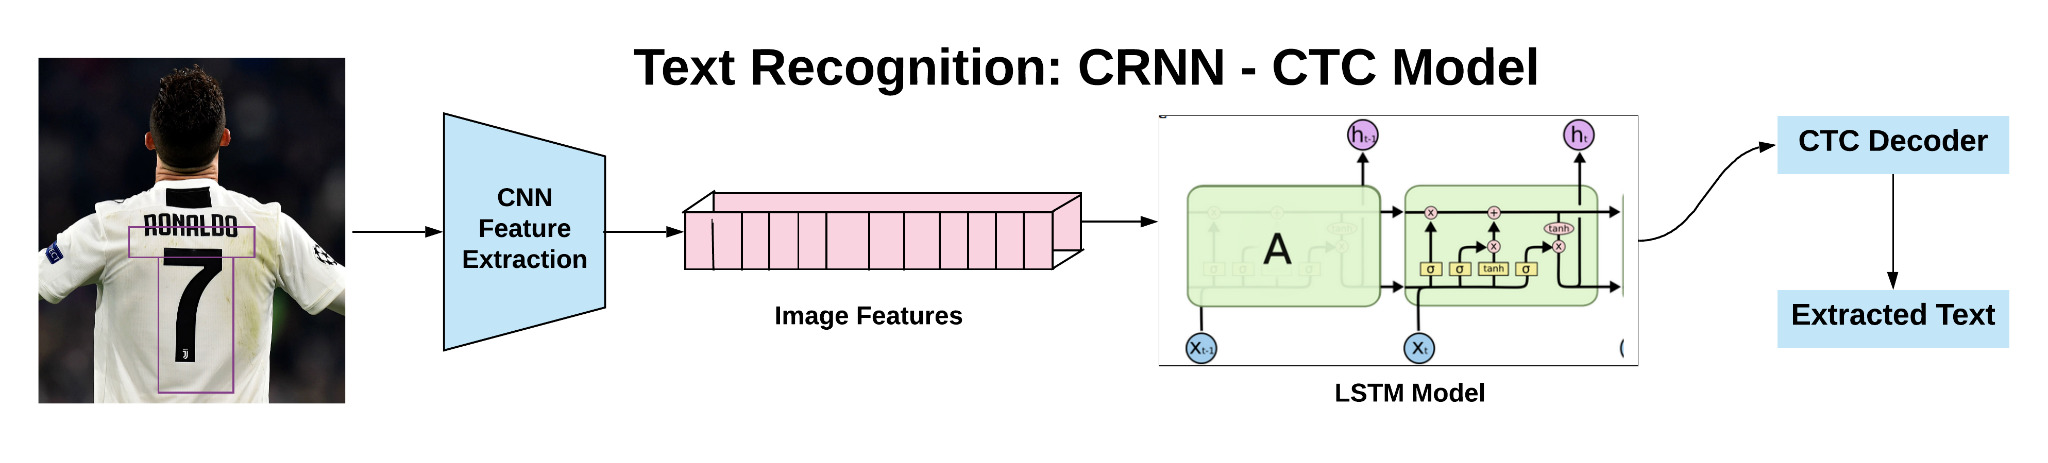

In [1]:
# Text Recognition Pipeline

from IPython import display
display.Image("data/images/CV_A5_Text_Recognition_with_CRNN_CTC_Network-01.jpg")

After the text detection step, regions, where the text is present, are cropped and sent through convolutional layers to get the features from the image. Later these features are fed to many-to-many LSTM architecture, which outputs softmax probabilities over the vocabulary. These outputs from different time steps are fed to the CTC decoder to finally get the raw text from images.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)